# CAR PRICE PREDICTION

## Dataset

The dataset has been downloaded from kaggle.

URL - https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars/data

## Features of the dataset

Car_Name <br>
Year <br>
Selling_Price (Target) <br>
Present_Price <br>
Driven_kms <br>
Fuel_Type <br>
Selling_type <br>
Transmission <br>
Owner

## Objective

Our objective is to take the features of the car as input data and train a machine learning model that can learn from the given metadata and predict the car price.

## Evaluation Metric

For prediction we generally use regression models. The possible evaluation metrics are Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
and Mean Absolute Error (MAE).

## Preparing toolkits

In [715]:
# importing EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelling libraries
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [716]:
# Loading the dataset from PC
df = pd.read_csv("C:\\Users\\kenka\\OneDrive\\Desktop\\OASIS\\cardata.csv", index_col=0)

In [717]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [718]:
df.axes

[Index(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 'ciaz',
        's cross', 'ciaz', 'ciaz',
        ...
        'brio', 'jazz', 'city', 'amaze', 'city', 'city', 'brio', 'city', 'city',
        'brio'],
       dtype='object', name='Car_Name', length=301),
 Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
        'Selling_type', 'Transmission', 'Owner'],
       dtype='object')]

In [719]:
df.tail()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,,,,,,,,
city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [720]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [721]:
df.shape

(301, 8)

In [722]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [723]:
df.info

<bound method DataFrame.info of           Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
Car_Name                                                             
ritz      2014           3.35           5.59       27000    Petrol   
sx4       2013           4.75           9.54       43000    Diesel   
ciaz      2017           7.25           9.85        6900    Petrol   
wagon r   2011           2.85           4.15        5200    Petrol   
swift     2014           4.60           6.87       42450    Diesel   
...        ...            ...            ...         ...       ...   
city      2016           9.50          11.60       33988    Diesel   
brio      2015           4.00           5.90       60000    Petrol   
city      2009           3.35          11.00       87934    Petrol   
city      2017          11.50          12.50        9000    Diesel   
brio      2016           5.30           5.90        5464    Petrol   

         Selling_type Transmission  Owner  
Car_Name     

In [725]:
df.duplicated().sum()

2

In [726]:
# Remove duplicate values
df.drop_duplicates(keep="first", inplace=True)

In [727]:
df.duplicated().sum()

0

In [728]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### No null values are present and duplicates have been removed.

In [729]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0


## Exploratory Data Analysis

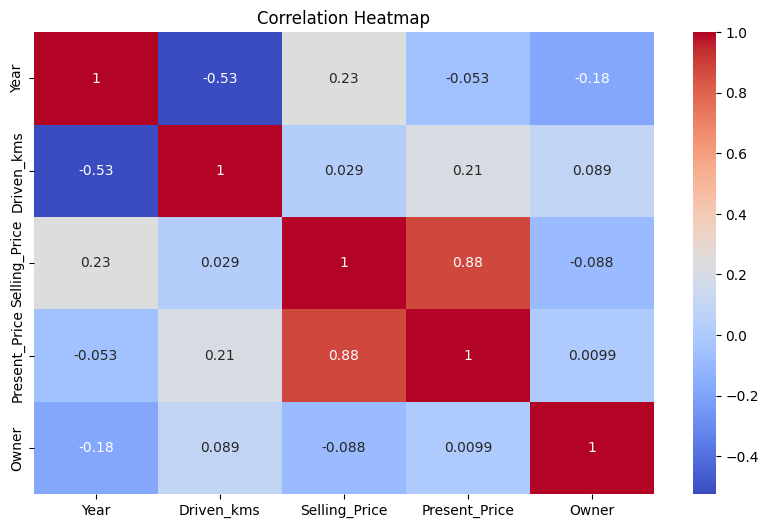

In [730]:
# Correlation Analysis
numerical_features=['Year','Driven_kms','Selling_Price','Present_Price','Owner']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

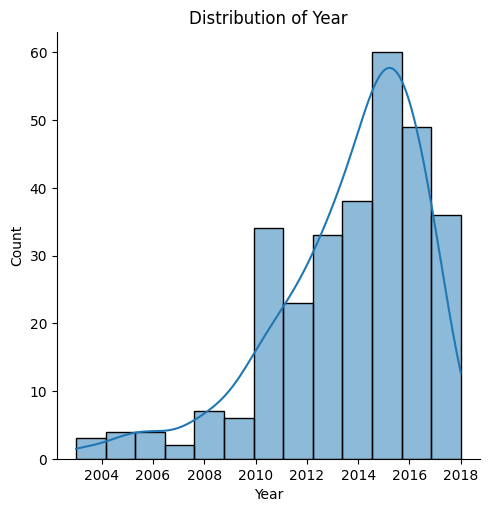

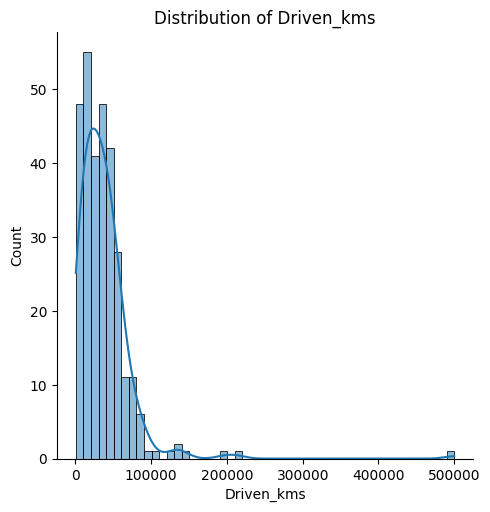

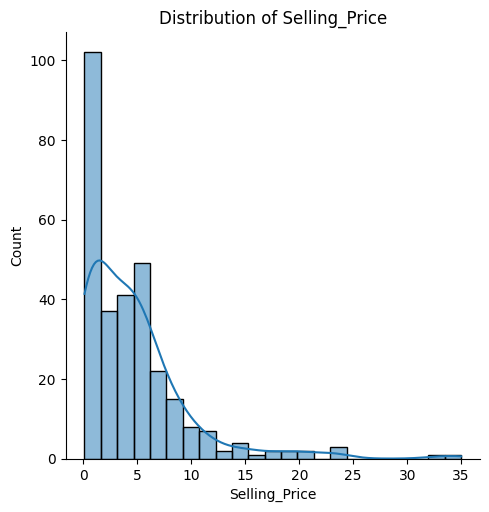

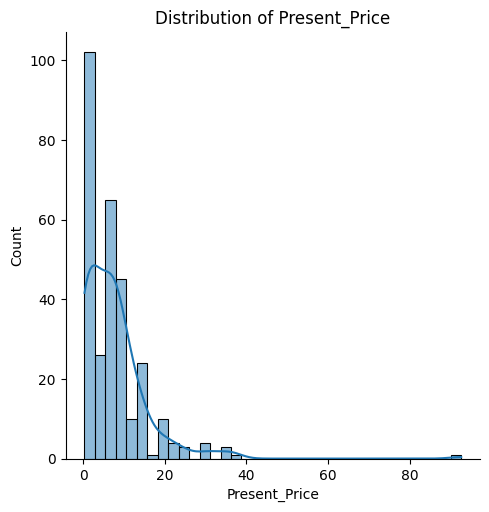

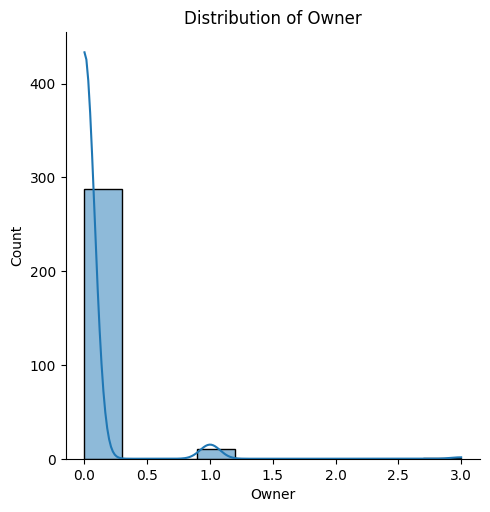

In [731]:
# Distribution of Numerical Features
plt.figure(figsize=(10,6))
for feature in numerical_features:
    sns.displot(data=df,x=feature,kde='True')
    plt.title(f'Distribution of {feature}')
    plt.show()

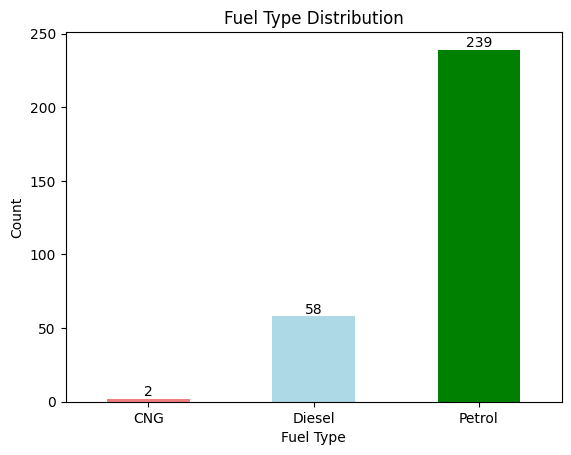

In [732]:
#Distribution of each fuel type
fc = df['Fuel_Type'].value_counts().sort_index()
x=fc.plot(kind='bar', color=['lightcoral', 'lightblue', 'green'])
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

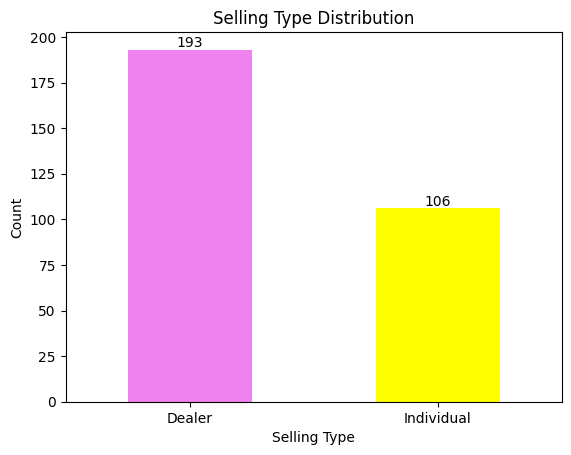

In [733]:
# Distribution of selling type
sc = df['Selling_type'].value_counts().sort_index()
x=sc.plot(kind='bar', color=['violet', 'yellow'])
plt.title('Selling Type Distribution')
plt.xlabel('Selling Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

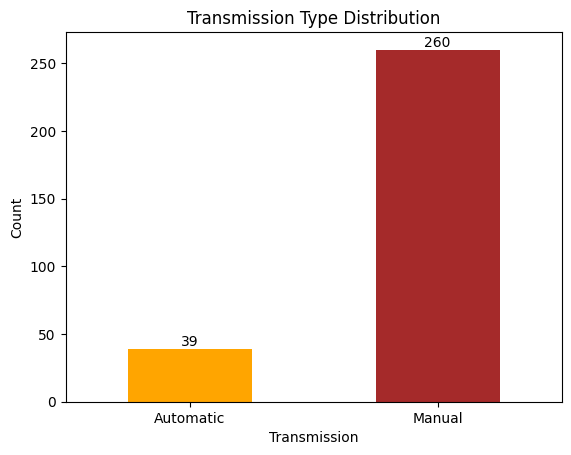

In [734]:
# Distribution of transmission type
tc = df['Transmission'].value_counts().sort_index()
x=tc.plot(kind='bar', color=['orange', 'brown'])
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

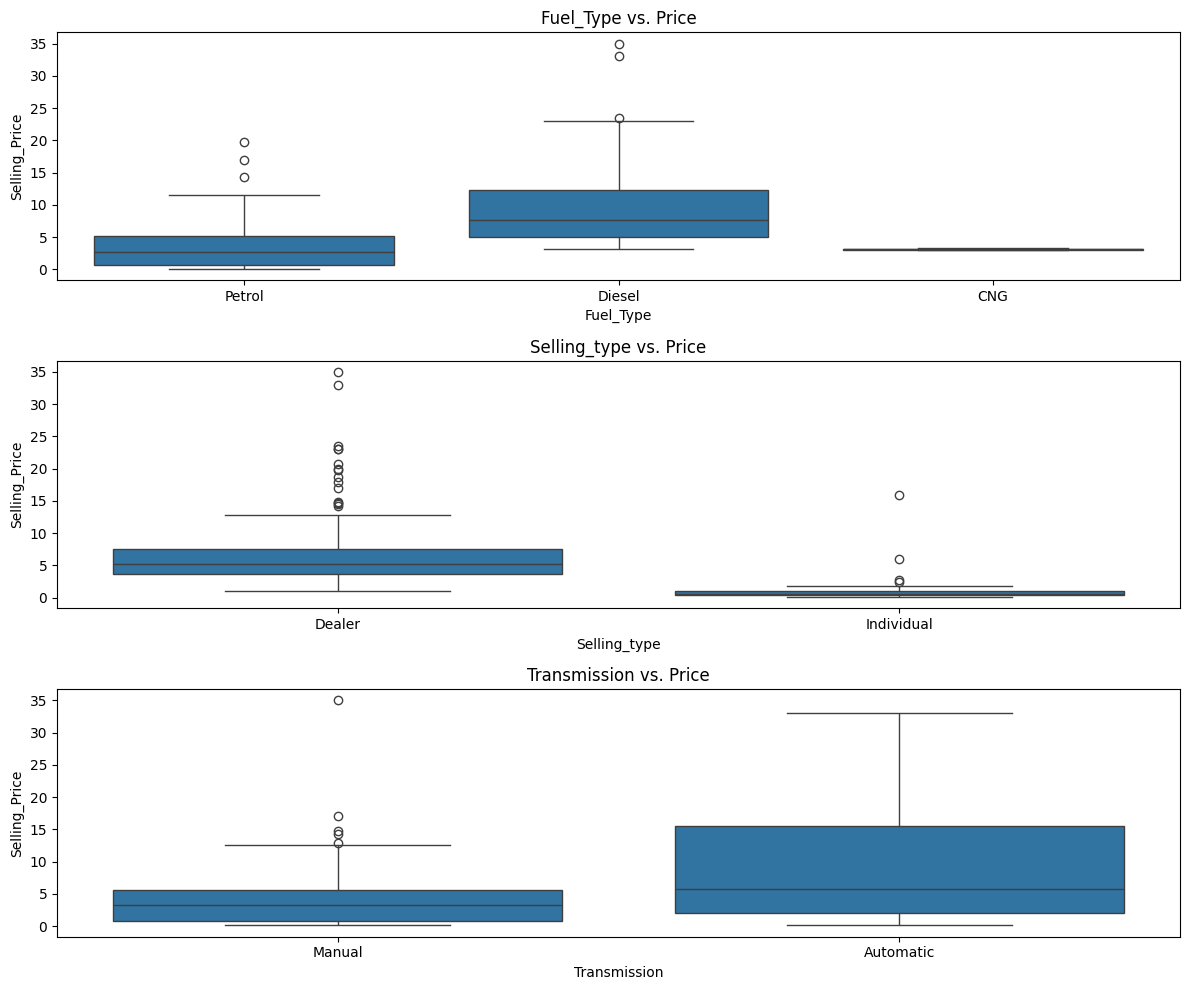

In [735]:
# Relationship between categorical features and target.
categorical_features=['Fuel_Type','Selling_type','Transmission']
plt.figure(figsize=(12, 10))
for i in categorical_features:
    plt.subplot(3, 1, categorical_features.index(i) + 1)
    sns.boxplot(data=df, x=i, y='Selling_Price')
    plt.title(f'{i} vs. Price')
plt.tight_layout()
plt.show()

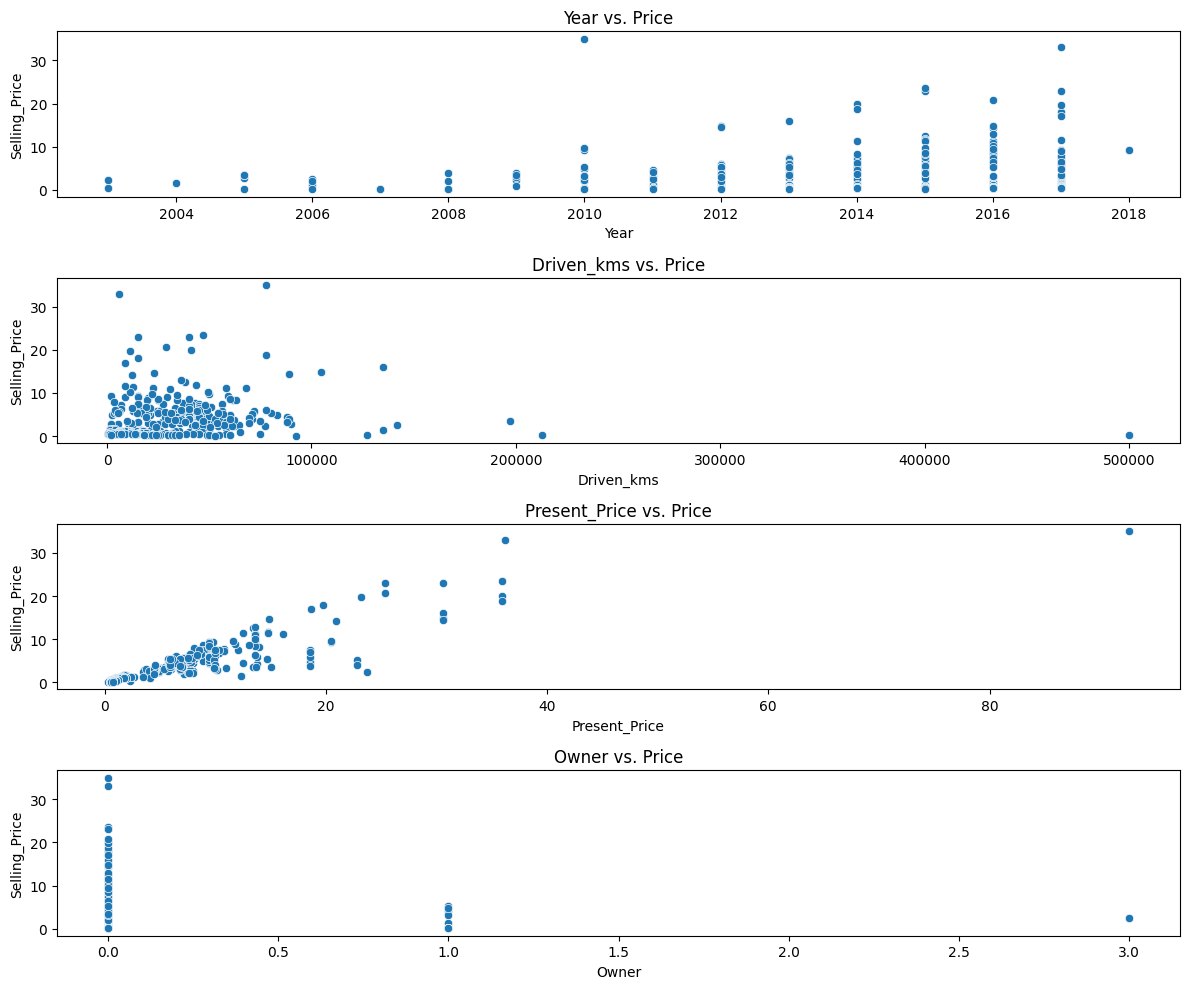

In [736]:
# Relationship between numerical features and targets.
numerical_features=['Year','Driven_kms','Present_Price','Owner']
plt.figure(figsize=(12, 10))
for i in numerical_features:
    plt.subplot(4, 1, numerical_features.index(i) + 1)
    sns.scatterplot(data=df, x=df[i], y=df['Selling_Price'])
    plt.title(f'{i} vs. Price')
plt.tight_layout()
plt.show()

## Visualization

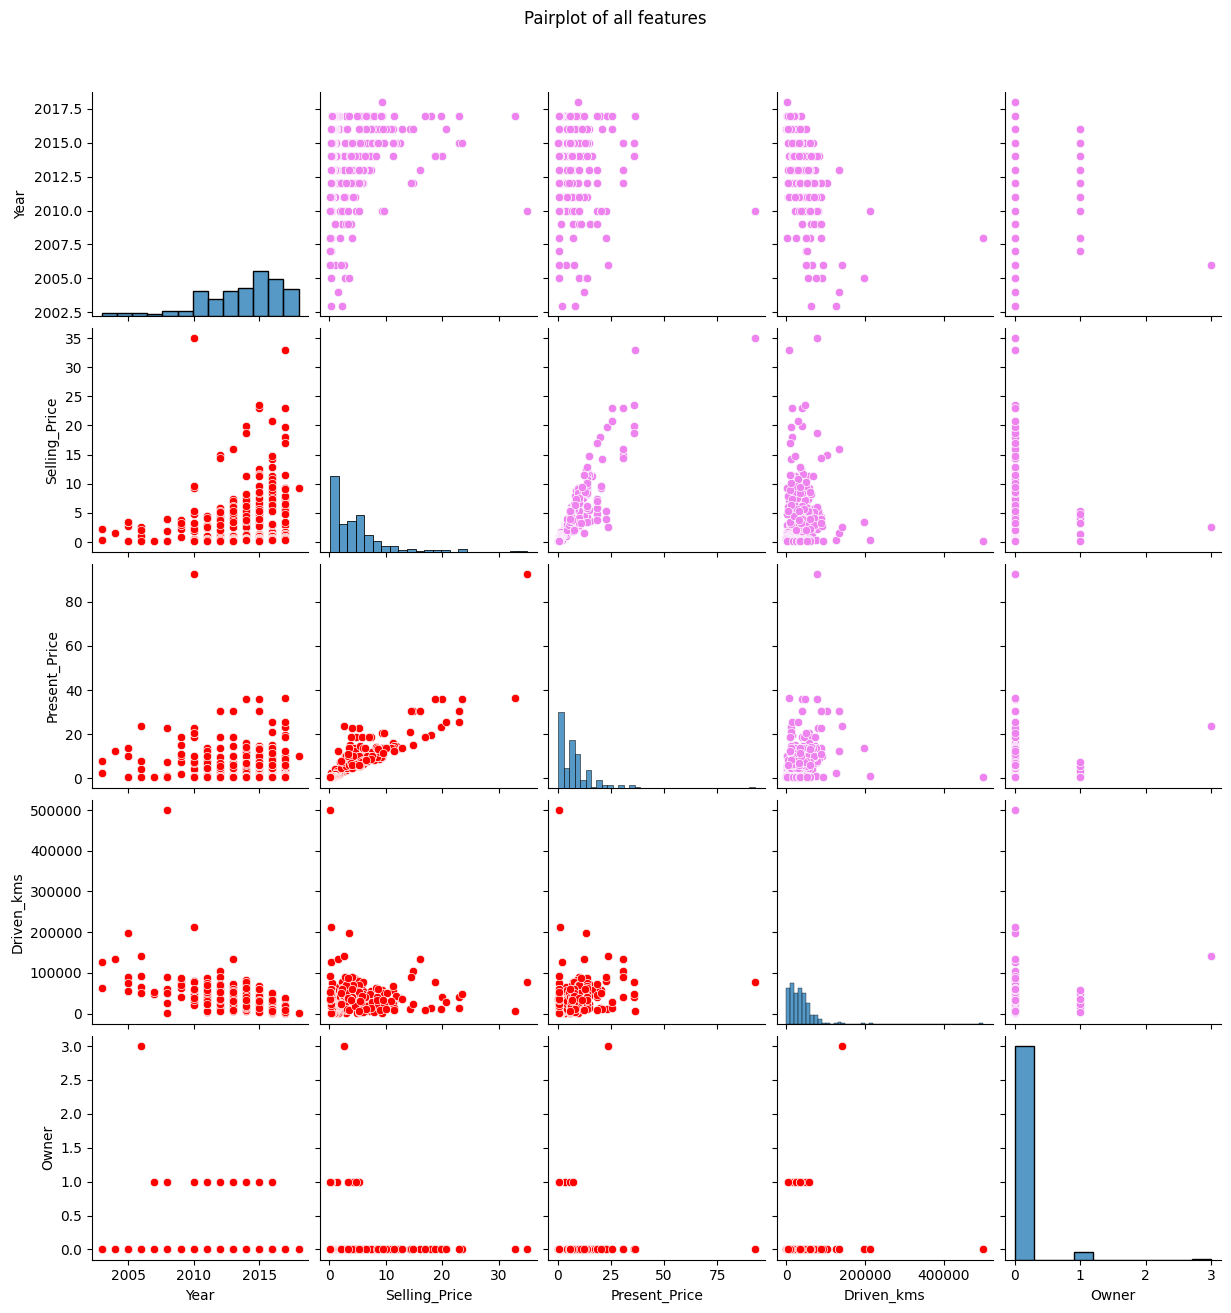

In [737]:
v=sns.pairplot(data = df)
v.map_upper(sns.scatterplot,color='violet')
v.map_lower(sns.scatterplot,color='red')
plt.suptitle("Pairplot of all features", y=1.05)
plt.show()

## Converting categorical values to numeric entities.

In [738]:
df.head(5)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [739]:
convertcol=['Fuel_Type','Selling_type','Transmission']
label_encoder = LabelEncoder()
for column in convertcol:
    df[column] = label_encoder.fit_transform(df[column])

In [740]:
df.head(5)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,2,0,1,0
sx4,2013,4.75,9.54,43000,1,0,1,0
ciaz,2017,7.25,9.85,6900,2,0,1,0
wagon r,2011,2.85,4.15,5200,2,0,1,0
swift,2014,4.60,6.87,42450,1,0,1,0


## Modelling

In [741]:
# Splitting the dataset
x = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [742]:
x.dtypes

Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int32
Selling_type       int32
Transmission       int32
Owner              int64
dtype: object

In [743]:
y.dtypes

dtype('float64')

In [744]:
x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,,,,,,,
ritz,2014,5.59,27000,2,0,1,0
sx4,2013,9.54,43000,1,0,1,0
ciaz,2017,9.85,6900,2,0,1,0
wagon r,2011,4.15,5200,2,0,1,0
swift,2014,6.87,42450,1,0,1,0


In [745]:
y.head()

Car_Name
ritz       3.35
sx4        4.75
ciaz       7.25
wagon r    2.85
swift      4.60
Name: Selling_Price, dtype: float64

In [746]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [747]:
x.shape

(299, 7)

In [748]:
x_train.shape

(149, 7)

In [749]:
y.shape

(299,)

In [750]:
y_train.shape

(149,)

In [751]:
x_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,,,,,,,
city,2016,13.60,10980,2,0,1,0
verna,2015,9.40,36000,2,0,1,0
brio,2015,6.82,31427,2,0,0,0
city,2016,11.60,33988,1,0,1,0
elantra,2015,14.79,12900,2,0,0,0
...,...,...,...,...,...,...,...
Bajaj Pulsar 150,2008,0.75,60000,2,1,1,0
corolla altis,2013,18.61,56001,2,0,1,0
Royal Enfield Thunder 350,2016,1.50,18000,2,1,1,0


In [760]:
# Initialize and fit the model - Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
print("Training score =",model.score(x_train,y_train))
print("Test score =",model.score(x_test,y_test))

Training score = 0.9076854230019711
Test score = 0.7904427077481844


In [761]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred

array([ 7.5996068 ,  7.60845186,  1.52304322,  6.77988855, 11.61867951,
        4.63051987,  8.43723159,  1.84084446,  8.68235171, -0.96981694,
       10.01876362, -0.90647837,  1.35146877,  1.67274452,  4.86274713,
        5.08992738,  1.40797655,  1.9960158 , 21.89496354,  0.96659659,
        1.04085429,  2.40675952,  5.67438958,  0.21998291,  6.02767086,
        7.88826035,  8.39750471,  1.27767505,  4.8766578 ,  4.91389642,
        6.3809098 ,  5.3870488 ,  6.03732436,  2.82225422,  2.89965846,
        6.75570718,  1.38287346, -5.23642372,  1.47186413, 10.81352196,
        7.06432232,  8.80811233,  1.77361155,  4.36286108,  1.0940389 ,
       -2.13160864,  8.21324756,  4.45579927,  6.24594056, -0.56860906,
        0.78080352,  0.31329977, 10.07452758,  9.2305739 ,  7.32519057,
        5.94533695,  3.75533762,  3.44206511,  9.31794766,  9.16927477,
        5.54226442,  0.95429354,  0.11394136, -0.86801229,  2.35550126,
        2.85211903,  7.88043692,  8.00704202,  2.86885431,  7.07

In [764]:
y_pred.corr

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [762]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error : {mae}')
print(f"R2-score : {r2}")

Mean Squared Error: 3.7106492184264472
Mean Absolute Error : 1.2106060545108182
R2-score : 0.7904427077481844
